In [1]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
# make fake data
lon = np.linspace(-80,80,25)
lat = np.linspace(30,70,25)
lon2d, lat2d = np.meshgrid(lon,lat)
data = np.cos(lat2d*np.pi/180.0) + np.sin(lon2d*np.pi/180.0)

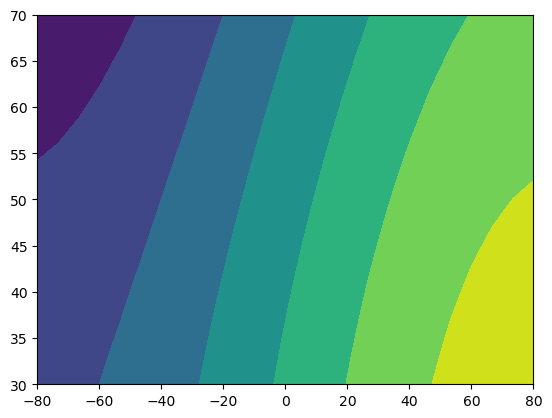

In [3]:
plt.contourf(lon2d,lat2d,data)

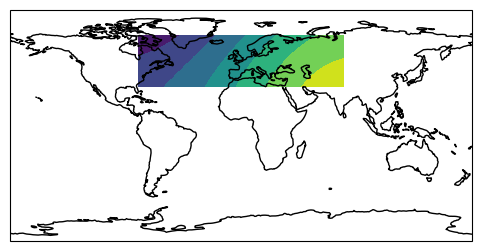

In [4]:
plt.figure(figsize=(6,3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon,lat,data)

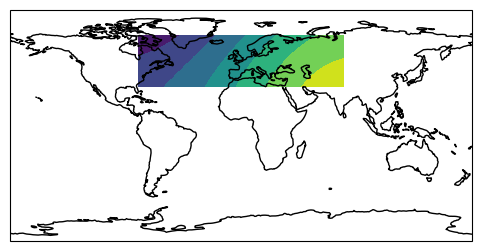

In [5]:
plt.figure(figsize=(6,3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon,lat,data,transform=ccrs.PlateCarree())

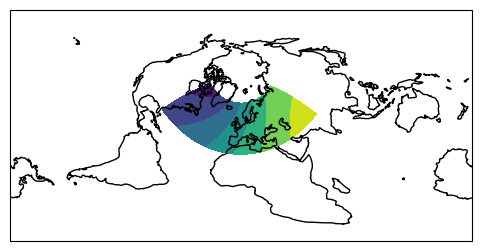

In [6]:
plt.figure(figsize=(6,3))
#ax = plt.axes(projection=ccrs.Mercator())
ax = plt.axes(projection=ccrs.RotatedPole(pole_longitude=-177.5,pole_latitude=37.5))
ax.set_global()
ax.coastlines()
ax.contourf(lon,lat,data,transform=ccrs.PlateCarree())
#ax.contourf(lon,lat,data)

## Read the data

In [7]:
import xarray as xr
url = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/monthly/2005-2017/temp'
data = xr.open_dataset(url)
sst = data.tan[3,0,:,:].values
lat = data.lat[:].values
lon = data.lon[:].values

/Users/jimp/anaconda3/lib/python3.11/site-packages/xarray/coding/times.py:206: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)
/Users/jimp/anaconda3/lib/python3.11/site-packages/xarray/coding/times.py:358: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_62297/135737948.py:3: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  data = 

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.ticker as mticker
from matplotlib import cm
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

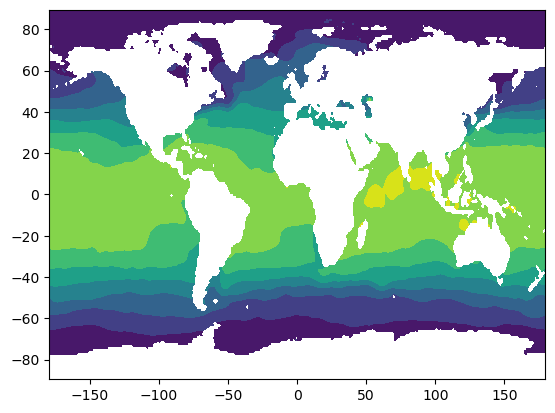

In [9]:
X, Y = np.meshgrid(lon,lat)
plt.contourf(X,Y,sst)

/Users/jimp/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/jimp/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


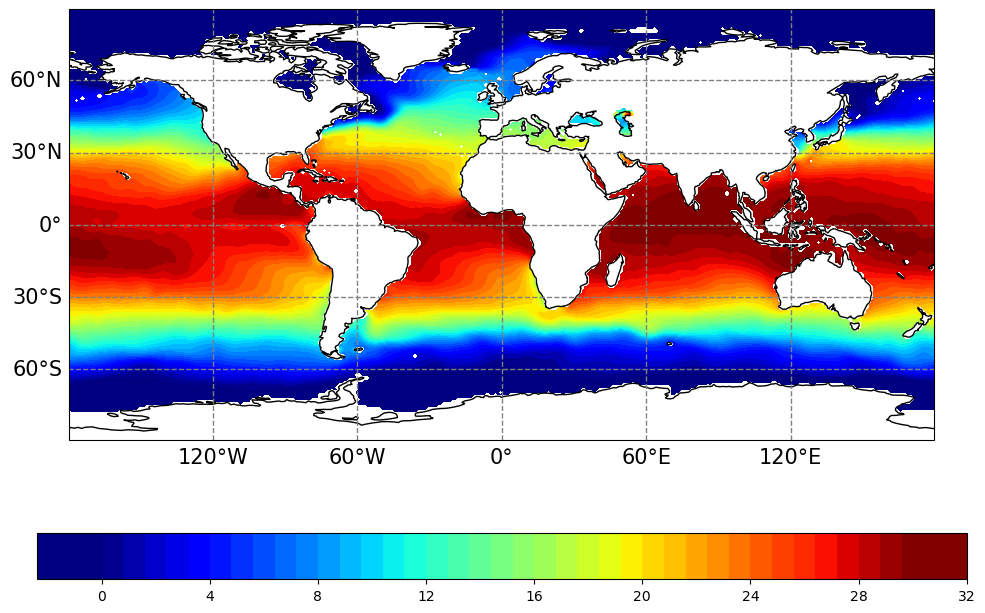

In [10]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(X,Y,sst,50,cmap=cm.jet,vmin=0,vmax=30,transform=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,color='gray',linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size':15}
gl.ylabel_style = {'size':15}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatted = LATITUDE_FORMATTER
plt.colorbar(orientation='horizontal')

In [11]:
lat2 = data.lat.sel(lat=slice(10,30)).values
lon2 = data.lon.sel(lon=slice(-170.0,-150)).values
sst2 = data.tan.sel(time=data.time[0].values,lev=0,lat=slice(10,30),lon=slice(-170.0,-150))
X2, Y2 = np.meshgrid(lon2,lat2)

/Users/jimp/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/jimp/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


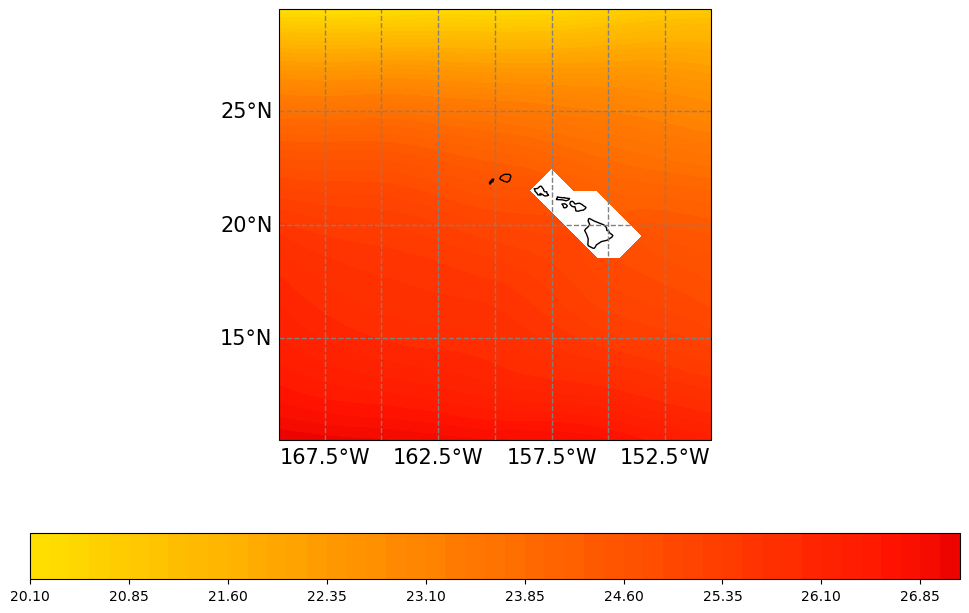

In [12]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(X2,Y2,sst2,50,cmap=cm.jet,vmin=0,vmax=30,transform=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,color='gray',linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size':15}
gl.ylabel_style = {'size':15}
gl.ylocator = mticker.FixedLocator([10,15,20,25,30])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatted = LATITUDE_FORMATTER
plt.colorbar(orientation='horizontal')

# GIS data

In [14]:
import geopandas as gpd


In [15]:
shape = './data/nybb.shp'
pop = './data/population.dat'
map_df = gpd.read_file(shape)
df = pd.read_csv(pop,header=0)

<Axes: >

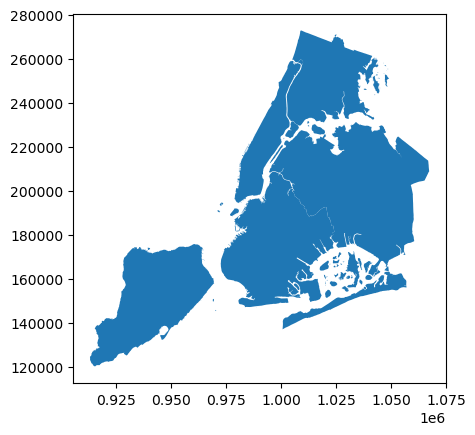

In [16]:
map_df.plot()

In [17]:
merged = map_df.set_index('BoroName').join(df.set_index('Borough'))

In [18]:
merged.head()

,BoroCode,Shape_Leng,Shape_Area,geometry,County,Census,GDP,sqmile,sqkm,personpsqmile,personpsqkm
BoroName,,,,,,,,,,,
Staten Island,5,330454.806607,1.623847e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",Richmond,495747,14.514,57.5,148.9,8618,3327
Manhattan,1,357176.132581,6.363978e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",New York,1694251,600.244,22.7,58.8,74781,28872
Bronx,2,464475.067699,1.186824e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",Bronx,1472654,42.695,42.2,109.3,34920,13482
Brooklyn,3,742297.830402,1.937844e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",Kings,2736074,91.559,69.4,179.7,39438,15227
Queens,4,874225.139404,3.048479e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",Queens,2405464,93.310,108.7,281.5,22125,8542


/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_62297/4274616466.py:5: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm)


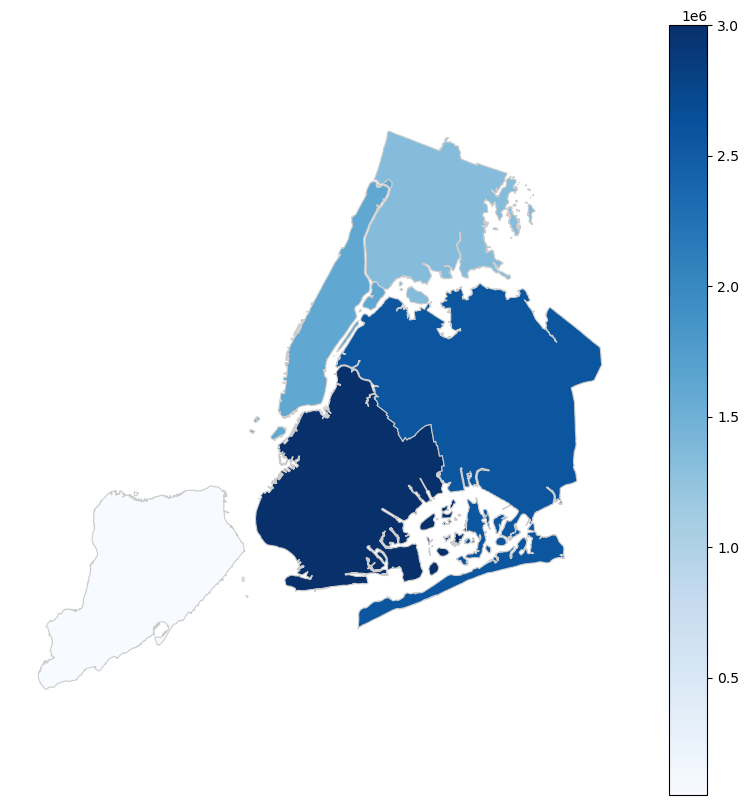

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
merged.plot(column='Census',cmap='Blues',ax=ax,linewidth=0.8,edgecolor='0.8')
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Blues',norm=plt.Normalize(vmin=50000,vmax=3000000))
fig.colorbar(sm)